# Generate plots for QP trapping simulation

In [1]:
from QPresonator import QPresonator

In [2]:
from TrappingSimulator import QPtrapper

In [3]:
duration = 1 # seconds to record data
sampleRate = 300e6
N = int(duration*sampleRate)
tauTrap = 140e-6
tauRelease = 100e-6
tauCommon = 4e-4
tauRare = 1e-2
tauRecomb = 2e-4
phi = 0.464
Lj = 26e-12 # squid inductance at zero phase bias
args = {'N':N,'Lj':Lj,'tauTrap':tauTrap,'tauRelease':tauRelease,'tauCommon':tauCommon,'tauRare':tauRare,
        'tauRecomb':tauRecomb,'sampleRate':sampleRate,'phi':phi,'Delta':2.72370016e-23,'T':0.025}

##### Above, we define the parameters we'll work with for trapping statistics: collect 1 second of data with 300 MHz sampling rate, the various tau's are poisson characteristic timescales for trapping events, release events, common events which create a pair of QPs in the bulk, rare events which generate many pairs, and recombination events in which a pair of QPs return to the condensate. Phi is the flux bias in units of the flux quantum, it sets the phase bias as d = pi * phi. Lj is the zero flux bias and zero trapped QP inductance of the SQUID.

In [4]:
trapper = QPtrapper(**args)

#### Now we have the trapping events, let's generate the resonator response. define some more parameters

In [7]:
L = 1e-9
C = 0.95e-12
Qi = 2e5
Qe = 4e3
photonRO = 2

In [8]:
resArgs = {'L':L,'C':C,'photonRO':photonRO,'Qi':Qi,'Qe':Qe,'sampleRate':sampleRate}

In [9]:
res = QPresonator(trapper,**resArgs)

In [5]:
import pickle

In [16]:
with open('trapper1s.pkl','wb') as f:
    pickle.dump(trapper,f)

In [6]:
with open('trapper1s.pkl','rb') as f:
    trapper = pickle.load(f)

#### filter the signals with a moving average weighted by Hann window. avgTime chosen to give SNR = 50

In [13]:
from scipy.constants import pi
avgTime = 4*res.Qt*50/(photonRO*2*pi*res.f0)

In [15]:
nAvg = int(max(avgTime*sampleRate,1))

In [24]:
from scipy.signal import windows, convolve
window = windows.hann(nAvg)
rhann = convolve(res.signal.real,window,mode='same')/sum(window)
ihann = convolve(res.signal.imag,window,mode='same')/sum(window)

#### Save the raw data

In [17]:
with open('rawSignalReal.pkl','wb') as f:
    pickle.dump(res.signal.real,f)

In [18]:
with open('rawSignalImag.pkl','wb') as f:
    pickle.dump(res.signal.imag,f)

#### Let's look at the data with a histogram

In [19]:
from matplotlib.pyplot import hist2d, show

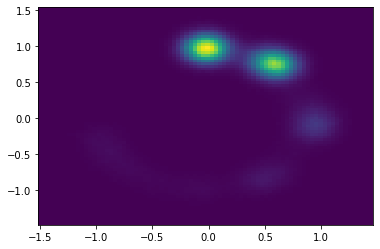

In [25]:
hist2d(rhann,ihann,bins=(80,80));show()

#### Now let's try to fit some normal distributions to these clusters

In [28]:
from numpy import mgrid, vstack, reshape
from scipy.stats import gaussian_kde

In [29]:
deltax = (max(rhann) - min(rhann))/20.
deltay = (max(ihann)-min(ihann))/20.
xmax = max(rhann)+deltax
xmin = min(rhann)-deltax
ymax = max(ihann)+deltay
ymin = min(ihann)-deltay
xx,yy = mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = vstack([xx.ravel(),yy.ravel()])
values = vstack([rhann,ihann])

#### Above, we create a mesh with 200 points per dimension and add the data. Next, we'll use scipy.stats.gaussian_kde to fit the multimodal distribution.

In [30]:
kernel = gaussian_kde(values)

#### Now let's plot

In [31]:
from matplotlib.pyplot import subplots

In [35]:
from numpy import rot90

MemoryError: 

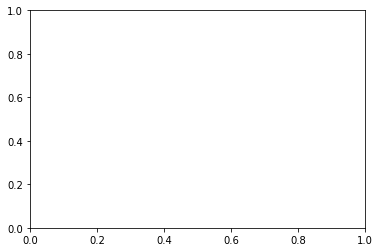

In [36]:
fig,ax = subplots()
ax.imshow(rot90(reshape(kernel(positions).T,xx.shape)),extent=[xmin,xmax,ymin,ymax])
ax.plot(rhann,ihann,'k.',markersize=2)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
show()

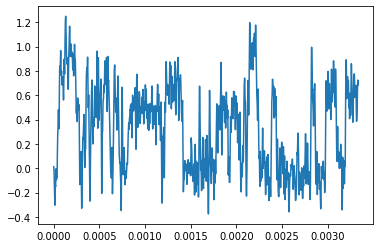

In [27]:
from matplotlib.pyplot import plot
from numpy import arange
time = arange(1000000)/sampleRate
plot(time,rhann[:1000000]);show()

# I'm running into memory problems because the trapper and resonator objects are so large. All I need now are the traces, so I'll start a new document and clear up the memory held by this python kernel.

### I'll need to rerun the resonator again because I want to save a dictionary of all the relevant parameters.

In [1]:
import pickle

In [2]:
with open(r"E:\QPtrapperData\trapper1s.pkl",'rb') as f:
    trapper = pickle.load(f)

In [3]:
from QPresonator import QPresonator

In [4]:
L = 1e-9
C = 0.95e-12
Qi = 2e5
Qe = 4e3
photonRO = 2
sampleRate = 300e6
resArgs = {'L':L,'C':C,'photonRO':photonRO,'Qi':Qi,'Qe':Qe,'sampleRate':sampleRate}
res = QPresonator(trapper,**resArgs)

In [6]:
with open(r"E:\QPtrapperData\resParams.pkl",'wb') as f:
    pickle.dump(res.dParameters,f)

In [7]:
with open(r"E:\QPtrapperData\nTrapped.pkl",'wb') as f:
    pickle.dump(trapper.nTrapped,f)

In [8]:
with open(r"E:\QPtrapperData\bulkPop.pkl",'wb') as f:
    pickle.dump(trapper.bulkPop,f)